# Modflow Post Proccessing Exercise



Use the Freyberg modflow NWT model "../data/Freyberg_transient" to answer the following questions

Assume the model units are in meters and days 

Please make figures look simple, nice and proffesional 

In [16]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import flopy
import platform
%matplotlib inline 

In [17]:
if "window" in platform.platform().lower():
    mf_exe = os.path.join("..","bin", "win",'mfnwt.exe')
elif "linux" in platform.platform().lower():
    mf_exe = os.path.join("..","bin", "linux",'mfnwt')
elif 'mac'in platform.platform().lower():
    mf_exe = os.path.join("..","bin", "mac",'mfnwt')
mf_exe

'..\\bin\\win\\mfnwt.exe'

In [18]:
model_ws = os.path.join('..','data','Freyberg_transient')
mf = flopy.modflow.Modflow.load('freyberg.nam',model_ws=model_ws,version='mfnwt',check=False,exe_name=mf_exe)
mf.run_model()

FloPy is using the following executable to run the model: ..\bin\win\mfnwt.exe

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.2.0 03/01/2020                        
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/02/09 12:03:21

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     5    Time step:     1    Groundwater-Flow Eqn.
 Solving

 Solving:  Stress period:   105    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   106    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   107    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   108    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   109    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   110    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   111    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   112    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   113    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   114    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   115    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   116    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   117    Time step:     1    Groundwater-Flow Eqn.

 Solving:  Stress period:   216    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   217    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   218    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   219    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   220    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   221    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   222    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   223    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   224    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   225    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   226    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   227    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   228    Time step:     1    Groundwater-Flow Eqn.

 Solving:  Stress period:   332    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   333    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   334    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   335    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   336    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   337    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   338    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   339    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   340    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   341    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   342    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   343    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   344    Time step:     1    Groundwater-Flow Eqn.

(True, [])

## 1. Plot a colormap of the hydraulic conductivity in all three layers

Please show a colorbar, and label units

hint; the hydraulic conductivity is stored in the UPW package

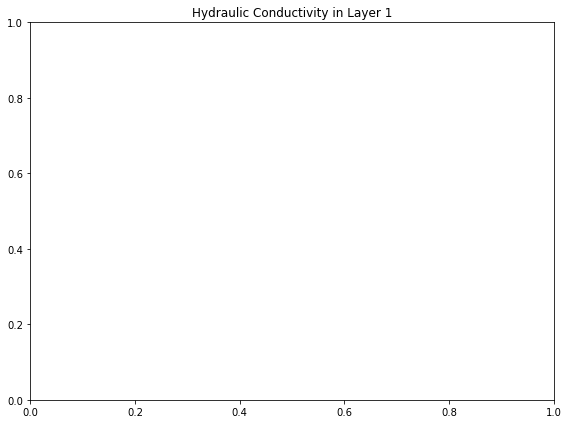

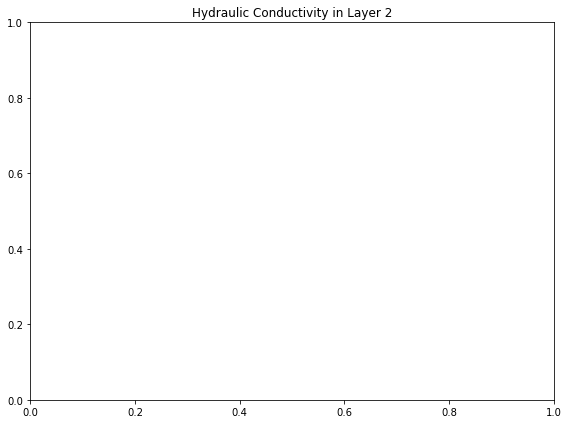

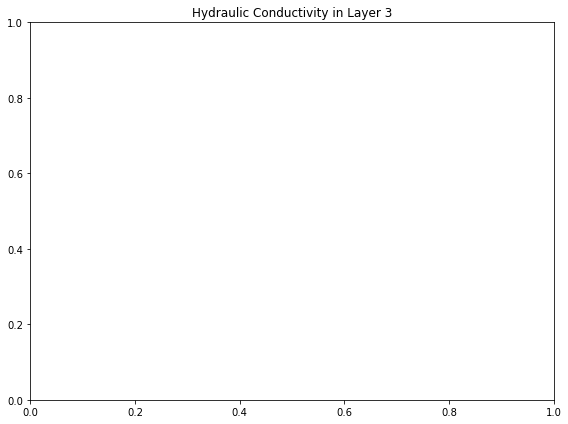

In [4]:
nlay = mf.dis.nlay
hk = mf.upw.hk.array
for lay in range(nlay):
    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    ax.set_title(f'Hydraulic Conductivity in Layer {lay+1}')
    fig.tight_layout()
    

## 2. Plot a hydrograph for each well below from 01/01/2015 - 01/01/2017

hint; heads are stored in the binary file freyberg.hds. Use the flopy function for reading such files - 
flopy.utils.HeadFile()

In [12]:
df = pd.DataFrame({'wellid': ['MW1', 'MW2', 'MW5', 'PW6'],
                   'layer': [1, 1, 1, 1],
                   'row': [9, 24, 18, 34],
                   'column': [9, 7, 16, 12],
                   'top_screen':[10,13.5,9.825,-15],
                   'bot_screen':[7.5,10,6.425,-20]})

df

,wellid,layer,row,column,top_screen,bot_screen
0,MW1,1,9,9,10.000,7.500
1,MW2,1,24,7,13.500,10.000
2,MW5,1,18,16,9.825,6.425
3,PW6,1,34,12,-15.000,-20.000


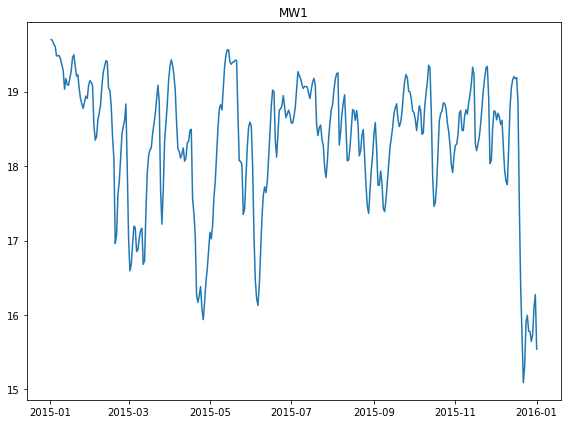

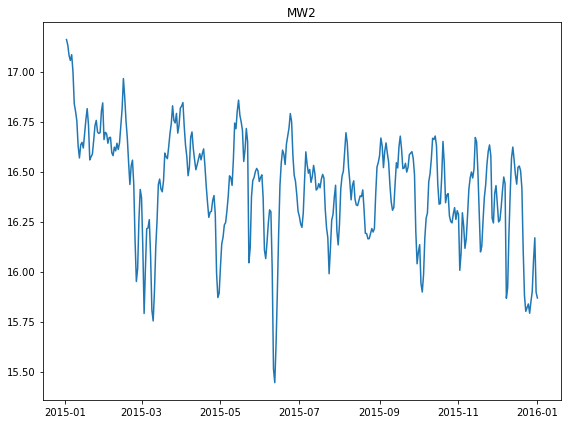

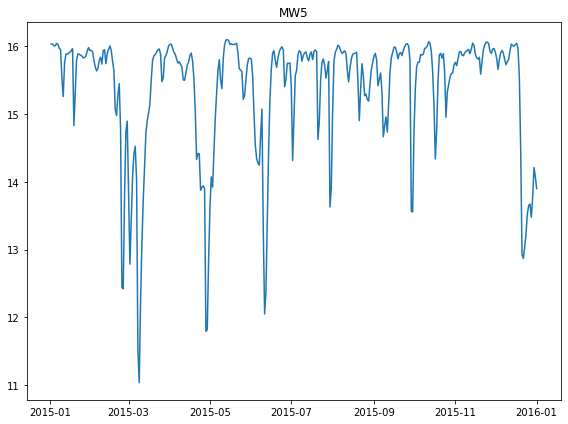

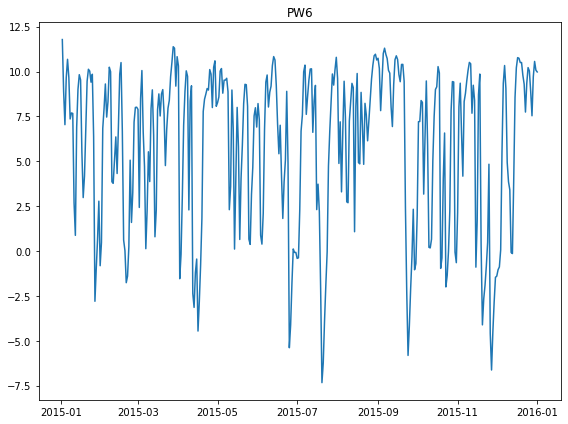

In [13]:
hdsobj = flopy.utils.HeadFile(os.path.join(model_ws,'freyberg.hds'))
start_datetime = pd.to_datetime(mf.modeltime.start_datetime)
for i, dfrow in df.iterrows():
    l, r, c = dfrow['layer'], dfrow['row'], dfrow['column']

    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    ts = hdsobj.get_ts(idx=(l-1,r-1,c-1))
    times = ts[:,0]
    dates = [start_datetime+pd.to_timedelta(day,unit='d') for day in times]
    hds = ts[:,1]

    ax.plot(dates, hds)

    ax.set_title(dfrow['wellid'])
    fig.tight_layout()

## 3.a Modify the pumping well in the wellfile and run the model

Increase pumping at the PW6 well by 25%, then rewrite the model in this directory; '../data/Freyberg_transient_25'



In [7]:
model_ws2 = os.path.join('..', 'data', 'Freyberg_transient_25')
mf2 = flopy.modflow.Modflow.load('freyberg.nam',model_ws=model_ws,version='mfnwt',check=False,exe_name=mf_exe)
wel = mf2.wel
spd = wel.stress_period_data.data
spd

{0: rec.array([(0,  8, 15, -0.), (0, 10, 12, -0.), (0, 19, 13, -0.),
            (0, 25,  9, -0.), (0, 28,  5, -0.), (0, 33, 11, -0.)],
           dtype=[('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('flux', '<f4')]),
 1: rec.array([(0,  8, 15, -148.245   ), (0, 10, 12, -128.36192 ),
            (0, 19, 13, -456.98163 ), (0, 25,  9,  -68.65711 ),
            (0, 28,  5,  -18.750366), (0, 33, 11, -481.40723 )],
           dtype=[('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('flux', '<f4')]),
 2: rec.array([(0,  8, 15, -545.9152  ), (0, 10, 12,  -79.81971 ),
            (0, 19, 13, -271.7706  ), (0, 25,  9,  -31.301023),
            (0, 28,  5,   -8.797573), (0, 33, 11, -681.07227 )],
           dtype=[('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('flux', '<f4')]),
 3: rec.array([(0,  8, 15, -1028.133   ), (0, 10, 12,  -143.67946 ),
            (0, 19, 13,   -46.791817), (0, 25,  9,   -70.67379 ),
            (0, 28,  5,   -43.35378 ), (0, 33, 11,  -166.06285 )],
           dtype=[('k', '<i4'), (

In [8]:
### write your code here
# hint; modify the well
nper = mf2.dis.nper
for sp in range(nper):
    spd[sp][-1][-1] = spd[sp][-1][-1]*1.25


###
wel2 = flopy.modflow.ModflowWel(mf2,stress_period_data=spd,dtype=spd[0].dtype)

In [9]:
mf2.change_model_ws(model_ws2)
mf2.write_input()
mf2.run_model()

FloPy is using the following executable to run the model: ..\bin\win\mfnwt.exe

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.2.0 03/01/2020                        
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/02/09 11:59:16

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     5    Time step:     1    Groundwater-Flow Eqn.
 Solving

 Solving:  Stress period:   100    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   101    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   102    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   103    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   104    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   105    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   106    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   107    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   108    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   109    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   110    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   111    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   112    Time step:     1    Groundwater-Flow Eqn.

 Solving:  Stress period:   207    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   208    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   209    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   210    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   211    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   212    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   213    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   214    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   215    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   216    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   217    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   218    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   219    Time step:     1    Groundwater-Flow Eqn.

 Solving:  Stress period:   317    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   318    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   319    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   320    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   321    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   322    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   323    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   324    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   325    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   326    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   327    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   328    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:   329    Time step:     1    Groundwater-Flow Eqn.

(True, [])

## 3.B Calculate the drawdown caused by the increase in pumping in the all wells and show plot

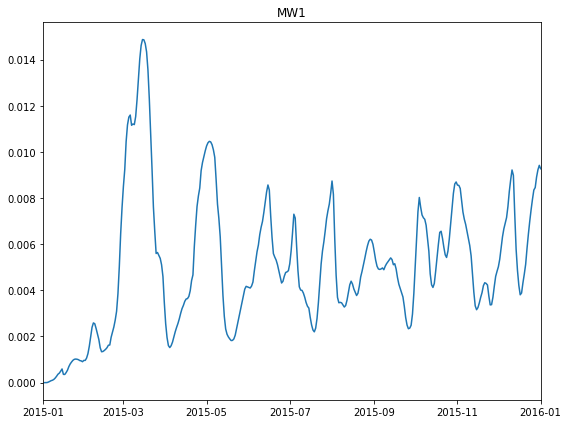

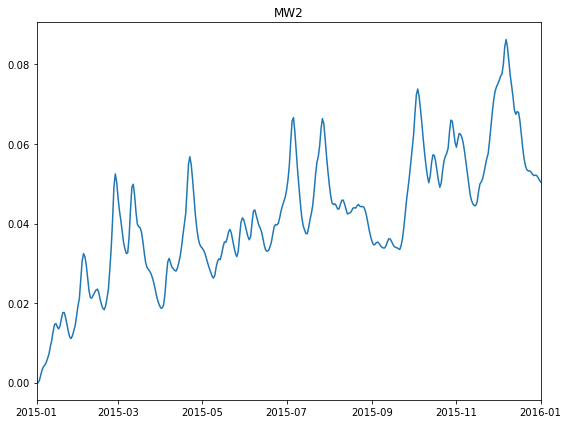

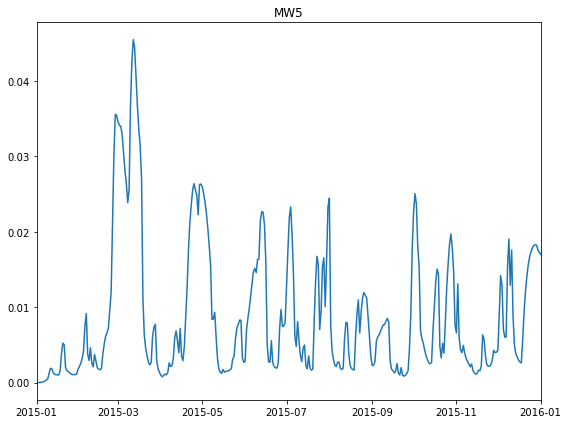

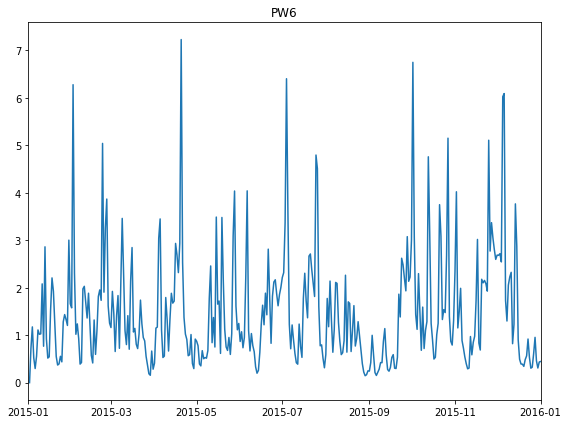

In [15]:
hdsobj = flopy.utils.HeadFile(os.path.join(model_ws,'freyberg.hds'))
hdsobj2 = flopy.utils.HeadFile(os.path.join(model_ws2,'freyberg.hds'))

start_datetime = pd.to_datetime(mf.modeltime.start_datetime)
for i, dfrow in df.iterrows():
    l, r, c = dfrow['layer'], dfrow['row'], dfrow['column']

    fig, ax = plt.subplots(figsize=(8,6))
    ### write your code here

    ts = hdsobj.get_ts(idx=(l-1,r-1,c-1))
    times = ts[:,0]
    dates = [start_datetime+pd.to_timedelta(day,unit='d') for day in times]
    hds = ts[:,1]
    
    ts2 = hdsobj2.get_ts(idx=(l-1,r-1,c-1))
    hds2 = ts2[:,1]

    dd = hds-hds2
    
    ax.plot(dates, dd)

    ax.set_title(dfrow['wellid'])
    ax.set_xlim([pd.to_datetime('01/01/2015'),pd.to_datetime('01/01/2016')])
    fig.tight_layout()